# Evolution of Sentiment Analysis Using IMDB Dataset

In the rapidly evolving field of Natural Language Processing (NLP), the ability of machines to understand and interpret human language has progressed from simple rule-based approaches to the complexities of deep learning and AI-driven models. In this project, we explore the evolution of sentiment analysis using IMDB movie reviews, highlighting the advancements in NLP techniques over time while also showcasing the differences in performance between machine learning, deep learning, and transformer-based models.

### Topics Covered in This Project:
- Data validation, text analysis, and visualizations
- Cleaning special characters in text
- Removing rare words
- Lemmatization of words
- Various vectorization techniques
- Sentiment analysis using Logistic Regression and Naive Bayes with Bag of Words and TF-IDF vectorization techniques
- Sentiment analysis with deep learning models using Bidirectional LSTM, Self Multi-Head Attention, and word2vec embeddings
- Sentiment analysis using a transformer-based BERT model
- Topic modeling using Latent Dirichlet Allocation (LDA)
- Conclusion and final thoughts

All functions used in this project are well-documented and can be found in the `utils.py` file.

GitHub repository for this project:

[https://github.com/kanitvural/evolution_of_sentiment_analysis_using_imdb_dataset](https://github.com/kanitvural/evolution_of_sentiment_analysis_using_imdb_dataset)

---

## Table of Contents

- [1. Data Validation](#1-data-validation)
- [2. Text Preprocessing](#2-text-preprocessing)
  - [2.1. Text Cleaning](#21-text-cleaning)
  - [2.2. Remove Duplicates](#22-remove-duplicates)
  - [2.3. Remove Stopwords](#23-remove-stopwords)
  - [2.4. Remove Rarewords](#24-remove-rarewords)
  - [2.5. Lemmatization](#25-lemmatization)
  - [2.6. Text Preprocessing Function](#26-text-preprocessing-function)
- [3. Exploratory Data Analysis](#3-exploratory-data-analysis)
  - [3.1. Countplot of Target](#31-countplot-of-target)
  - [3.2. WordCloud](#32-wordcloud)
  - [3.3. Distribution of Number of Words Per Reviews](#33-distribution-of-number-of-words-per-reviews)
  - [3.4. Most Frequent Words in Negative and Positive Reviews](#34-most-frequent-words-in-negative-and-positive-reviews)
- [4. Vectorization](#4-vectorization)
- [5. Sentiment Modelling](#5-sentiment-modelling)
  - [5.1. Sentiment Analysis with Machine Learning Models](#51-sentiment-analysis-with-machine-learning-models)
    - [5.1.1. Bag of Words (BoW)](#511-bag-of-words-bow)
    - [5.1.2. Term Frequency-Inverse Document Frequency (TF-IDF)](#512-term-frequency-inverse-document-frequency-tf-idf)
  - [5.2. Sentiment Analysis with Deep Learning Models](#52-sentiment-analysis-with-deep-learning-models)
  - [5.3. Sentiment Analysis with BERT Model](#53-sentiment-analysis-with-bert-model)
- [6. Topic Modeling](#6-topic-modeling)
  - [6.1. Data Preprocessing](#61-data-preprocessing)
  - [6.2. Tokenization](#62-tokenization)
  - [6.3. Creating a Dictionary](#63-creating-a-dictionary)
  - [6.4. Creating a Corpus](#64-creating-a-corpus)
  - [6.5. Creating the Latent Dirichlet Allocation (LDA) Model](#65-creating-the-latent-dirichlet-allocation-lda-model)
  - [6.6. Calculating Coherence Score](#66-calculating-coherence-score)
  - [6.7. Other Topic Modeling Methods](#67-other-topic-modeling-methods)
- [7. Conclusion and Final Thoughts](#7-conclusion-and-final-thoughts)

---

## Technologies Used:

- **Working Environment:** Ubuntu 22.04 LTS
- **Python:** The programming language used for the project.
- **TensorFlow & Keras:** Used to build deep learning models, including LSTM and Transformer architectures.
- **Transformers Library:** Utilized for fine-tuning and implementing the BERT model.
- **NLTK & TextBlob:** For text preprocessing, tokenization, and sentiment analysis.
- **Scikit-learn:** Used for machine learning models such as Logistic Regression and Naive Bayes, along with vectorization techniques like TF-IDF and BoW.
- **Gensim:** Applied for topic modeling using the Latent Dirichlet Allocation (LDA) method.
- **Seaborn & Matplotlib:** For visualizations and exploratory data analysis (EDA).
- **Pandas & Numpy:** For handling data and performing numerical computations.


## Installation

To run this project locally, follow these steps:

   ```bash
   git clone https://github.com/kanitvural/evolution_of_sentiment_analysis_using_imdb_dataset.git
   cd evolution_of_sentiment_analysis_using_imdb_dataset
   python3 -m venv venv
   - For Linux/macOS
   source venv/bin/activate
   - For Windows:
   .\venv\Scripts\activate
   pip install -r requirements.txt

In [30]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import Word

import tensorflow as tf
from keras import mixed_precision
import transformers
from transformers import TFDistilBertModel, BertTokenizer, TFBertModel
import tokenizers
from tensorflow.keras.saving import load_model

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

plt.style.use("ggplot")
sns.set_palette(sns.diverging_palette(220, 20))

# GPU Settings
mixed_precision.set_global_policy('mixed_float16')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

**Check TensorFlow GPU**

In [3]:
print("TensorFlow version:", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TensorFlow version: 2.18.0
GPU is available


### **1. Data Validation**

In this section, it has been determined that the dataset consists of 50,000 records with an equal distribution of positive and negative classes, and it includes some duplicate data.

In [4]:
data = pd.read_csv("data/IMDB_Dataset.csv")
df = data.copy()
df.head(2)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive


Shape of dataset

In [4]:
df.shape

(50000, 2)

Missing Values

In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

Labels

In [6]:
df["sentiment"].value_counts(dropna=False)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Describe

In [7]:
df.describe().T

,count,unique,top,freq
review,50000,49582,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",5
sentiment,50000,2,positive,25000


### **2. Text Preprocessing**

**2.1. Text Cleaning**

Due to its adverse effect on model performance, unwanted punctuation marks, special characters, HTML tags, numbers, and extra spaces have been removed from the comments, and all characters have been converted to lowercase to achieve a clean format.

In [8]:
df["review"] = df["review"].apply(clean_text)

**2.2. Remove Duplicates**

Since identical comments were mixed into the dataset, one instance of each of these comments has been removed from the dataset.

In [9]:
print(f"There are {df["review"].duplicated().sum()} duplicate reviews in imdb dataset")

There are 421 duplicate reviews in imdb dataset


Duplicate Sentences

In [10]:
duplicated_reviews = df[df["review"].duplicated(keep=False)][:2]
duplicated_groups = duplicated_reviews.groupby("review")

for review, group in duplicated_groups:
    print(f"Same sentences:\n {review}")
    print(group)
    print("-" * 100)

Same sentences:

 of all the films i have seen this one the rage has got to be one of the worst yet the direction logic continuity changes in plotscript and dialog made me cry out in pain how could anyone come up with something so crappy gary busey is know for his b movies but this is a sure w movie wwastetake for example about two dozen fbi local law officers surround a trailer house with a jeep wagoneer inside the jeep is ma and is confused as to why all the cops are about within seconds a huge gun battle ensues ma being killed straight off the cops blast away at the jeep with gary and company blasting away at them the cops fall like dominoes and the jeep with gary drives around in circles and are not hit by one single bulletpellet ma is killed and gary seems to not to have noticeddamn that guy is tough truly a miracle not since the sixshooter held bullets has there been such a miracle

                                                                                                  

In [11]:
df.drop_duplicates(inplace=True)
print(f"There are {df["review"].duplicated().sum()} duplicate reviews in imdb dataset")

There are 0 duplicate reviews in imdb dataset


**2.3. Remove Stopwords**

Stopword removal is the process of eliminating common, non-informative words (e.g., "and", "the", "for") from a text to help models focus on more meaningful content.


In [12]:
# nltk.download('stopwords')
sw = stopwords.words("english")
df["review"] = df["review"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

**2.4. Remove Rarewords**

It is undesirable to keep infrequently occurring words in the study. Therefore, their removal is beneficial.

In [13]:
temp_df = pd.Series(" ".join(df["review"]).split()).value_counts().sort_values(ascending=True)
temp_df.head()

filmore            1
whoopass           1
whatchugonnados    1
sheetmetal         1
backhand           1
Name: count, dtype: int64

A threshold of 1000 words has been selected. Words with a frequency of less than 1000 have been removed from the dataset.

In [14]:
rare_words = pd.Series(" ".join(df["review"]).split()).value_counts()[-1000:]
df["review"] = df["review"].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

**2.5. Lemmatization**

Lemmatization is the process of reducing a word to its base or dictionary form (lemma), ensuring that different forms of a word (e.g., "running," "ran," "runs") are represented by a single, standardized version, which helps improve the accuracy of natural language processing tasks.


In [15]:
# nltk.download("wordnet")

In [16]:
df["review"] = df["review"].apply(lambda x : " ".join(Word(word).lemmatize() for word in x.split()))

In [17]:
df.sample(2)

,review,sentiment
7509,saboteur one hitchcock yet discover less halfoverwhelmed french title la cinquième colonne ie fifth column evocative phrase underground spying sabotage organization set expectation quite high image finale top statue libertybasically saboteur much lighthearted step note another evocative phrase even mcguffin title lack humor character rather earth definitely fast paced chase movie across usa la ny saboteur drag foot sequence sequence sequence villain lovely ranch lovely ranch lovely villain pretty tame whole doesnt really add nothing meeting blind man mixing circus people soda city sequence ny ball sequence fall flatinging character little added suspense valueone big problem point relationship lead robert cummings priscilla lane building robert donat madeleine caroll step hence whole narrative structure floating depending addition new scene new scene onlying u nearer end since clear hook hero escape police villain action stop plotted sabotage step clearly scripted escaping police know hero cant go police running life villain prove innocenceif want better hitchcock wartime propaganda would advise chose foreign correspondant saboteur chase movie catchy finale well really gripping one sightseeing foreign correspondant well beautifully efficient scene umella crowd tulip field strange mill,negative
23619,honest god outline pretty much say planet andromina confused aunt jemima represented cheap la stripclub there stripper recent male visitor go recruit strippersthe men get mistaken king arrested spying woman although despite fact planet woman get two woman participate girlgirl sex scene eventually always happen science fiction cliche movie everywhere woman become convinced men good something well men made movie ratebut boy get see lot something prodigious amount softcore sex nudity one less plot usual flick change channel dont like kind movie grit teeth youre kind thing,negative


**2.6. Text Preporocess Function**

A function has been written to encompass all the processes mentioned above. Normally, having all tasks contained within a single function is not considered best practice; however, this function has been created specifically for this project and has been added to the `utils.py` file.


### **3. Exploratory data analysis**

**3.1. Countplot of Target**

The dataset contains 49579 reviews after droping duplicates with  28883 positive reviews and 24696 negative reviews. The countplot below illustrates this imbalance.

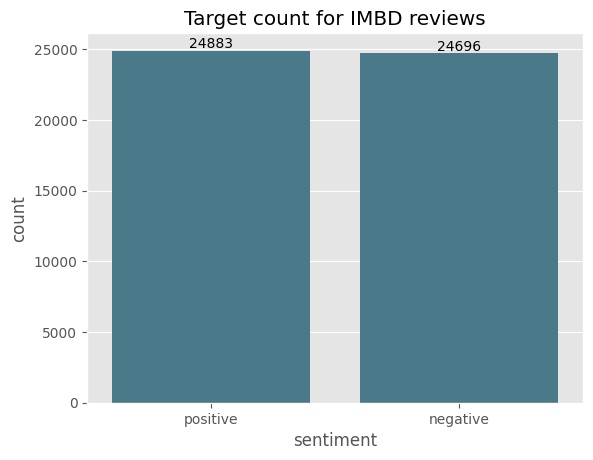

In [18]:
ax = sns.countplot(data=df, x = "sentiment")
plt.title('Target count for IMBD reviews')
ax.bar_label(ax.containers[0], fmt="%d")
plt.show()

**3.2. WordCloud**

A word cloud is a visual representation of the frequency of words in a text. Words that appear more frequently are displayed in larger fonts, while less frequent words are shown in smaller sizes. It is commonly used to quickly identify prominent terms in a dataset, offering a simple way to visualize the importance or repetition of certain words in a document or collection of texts.

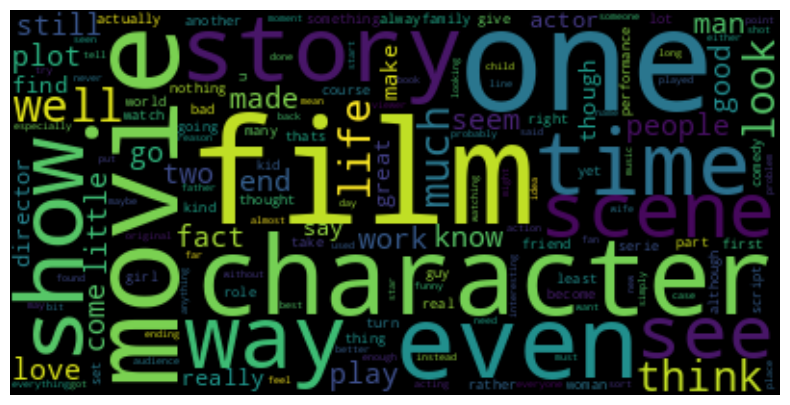

In [19]:
generate_word_cloud(df, "review", max_font_size= 75, max_words = 150 )

**3.2. Distribution of Number of Words Per Reviews**

The words used in negative and positive reviews have been counted and visualized, revealing that people tend to use more words in negative reviews. In both graphs, the rightward skew indicates that certain words are used very frequently in both negative and positive reviews.

In [20]:
positive_reviews = df.loc[df["sentiment"]=="positive", "review"]
negative_reviews = df.loc[df["sentiment"]=="negative", "review"]

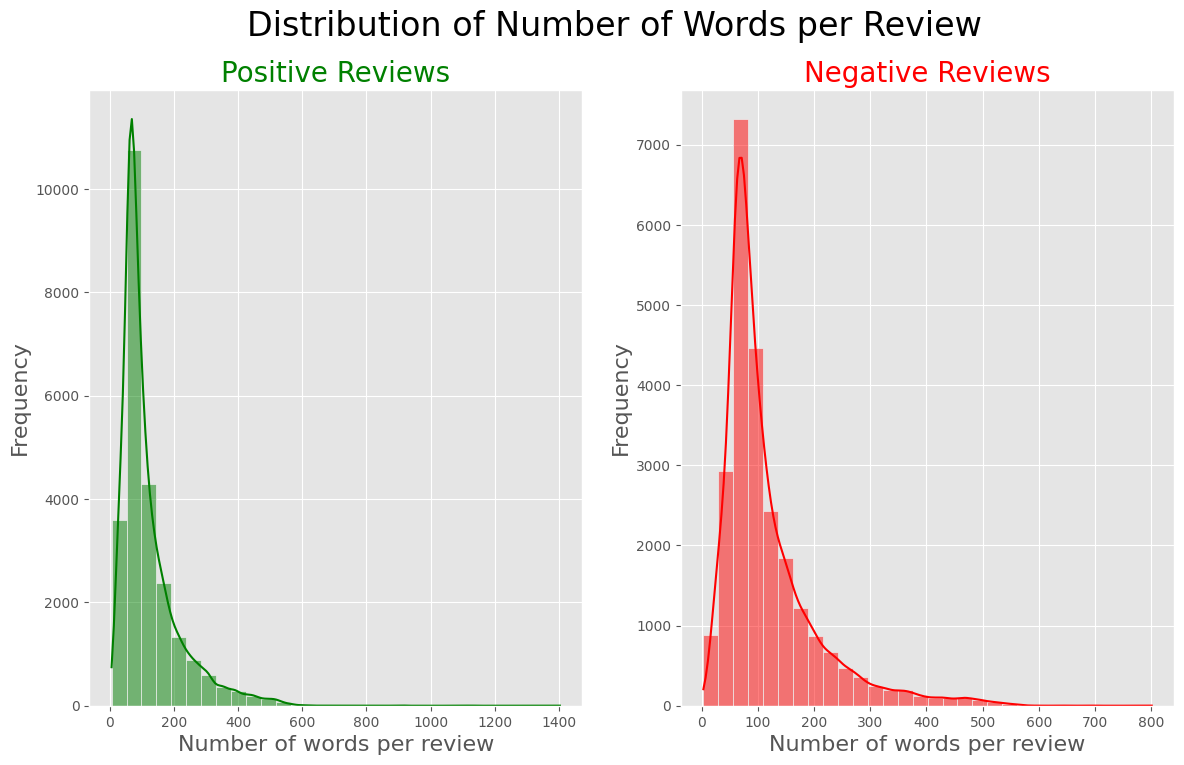

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

positive_word_counts = positive_reviews.str.split().apply(len)
sns.histplot(positive_word_counts, ax=ax1, bins=30, kde=True, color="green")  
ax1.set_title("Positive Reviews", fontsize=20, color="green")  
ax1.set_xlabel("Number of words per review", fontsize=16)  
ax1.set_ylabel("Frequency", fontsize=16) 

negative_word_counts = negative_reviews.str.split().apply(len)
sns.histplot(negative_word_counts, ax=ax2, bins=30, kde=True, color="red")  
ax2.set_title("Negative Reviews", fontsize=20, color="red") 
ax2.set_xlabel("Number of words per review", fontsize=16) 
ax2.set_ylabel("Frequency", fontsize=16) 

fig.suptitle("Distribution of Number of Words per Review", fontsize=24)
plt.show()

**3.3. Most Frequent Words in Negative and Positive Reviews**

The 10 most common words in negative and positive comments are visualized



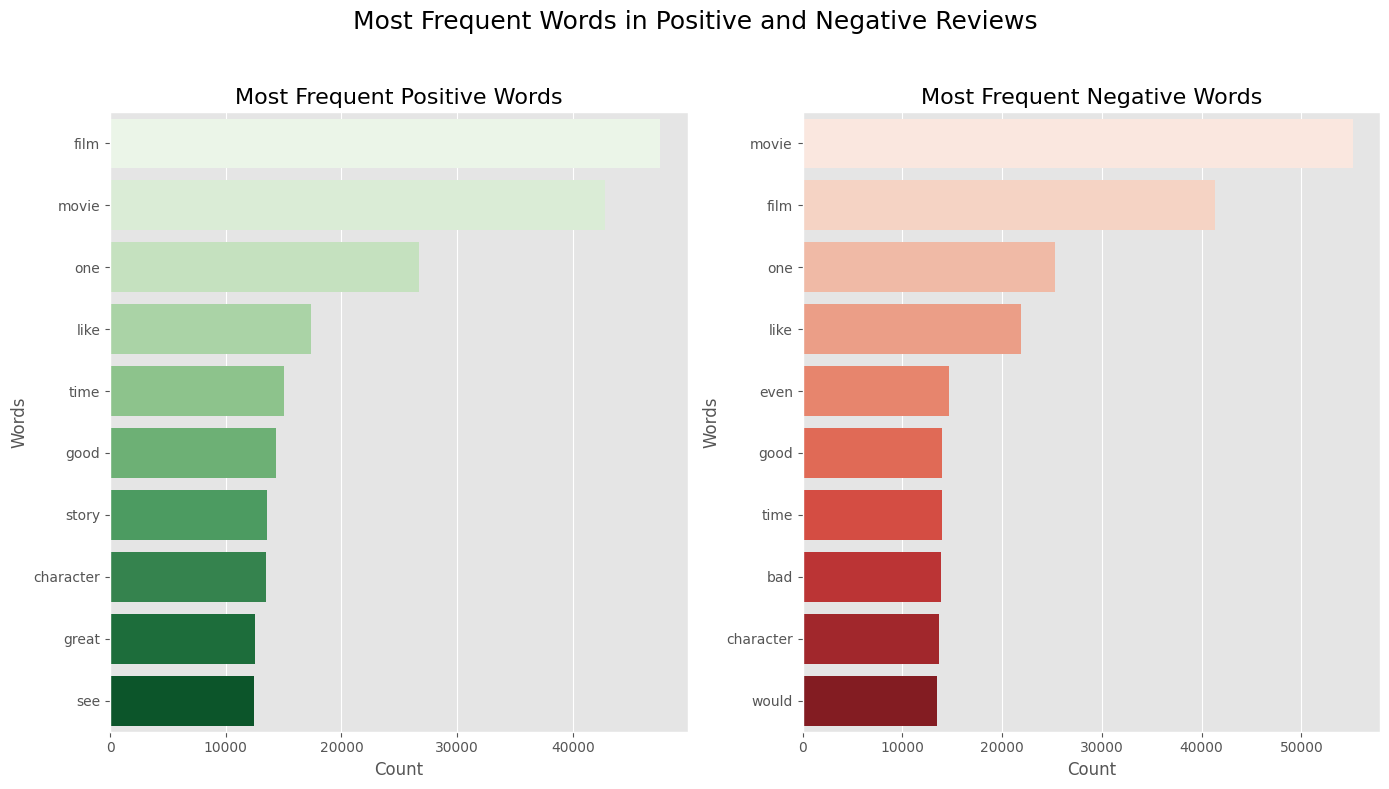

In [22]:
positive_words = positive_reviews.str.split(expand=True).stack().value_counts()
negative_words = negative_reviews.str.split(expand=True).stack().value_counts()

positive_top_words = positive_words.head(10).reset_index()
negative_top_words = negative_words.head(10).reset_index()

positive_top_words.columns = ['word', 'count']
negative_top_words.columns = ['word', 'count']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

sns.barplot(x='count', y='word', data=positive_top_words, ax=ax1, palette='Greens')
ax1.set_title('Most Frequent Positive Words', fontsize=16)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Words', fontsize=12)

sns.barplot(x='count', y='word', data=negative_top_words, ax=ax2, palette='Reds')
ax2.set_title('Most Frequent Negative Words', fontsize=16)
ax2.set_xlabel('Count', fontsize=12)
ax2.set_ylabel('Words', fontsize=12)

plt.suptitle('Most Frequent Words in Positive and Negative Reviews', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### **4. Vectorization**

Vectorization is a crucial step in natural language processing (NLP) that transforms text data into numerical representations, enabling machine learning models to understand and process the information. Various methods are employed for vectorization, each with its unique characteristics and applications:

1. `Bag of Words (BoW)` 

    The Bag of Words method is a simple approach that represents text data based on the frequency of words. Each document is treated as a collection of words, and the frequency of each word is counted, resulting in vectors that ignore the order of words or grammatical structure.

2. `Term Frequency-Inverse Document Frequency (TF-IDF)`
   
   TF-IDF vectorization was developed to address some of the biases that could arise from Count vectorizer. By weighing the frequency of words against their importance in the document corpus, TF-IDF helps to mitigate the influence of commonly used words that may not carry significant meaning, thus providing a more nuanced representation of text data.


`N-Grams`

N-grams are a concept that is specific to text vectorization methods, including Count Vectorizer and TF-IDF Vectorizer.

Explanation:
 N-grams: An n-gram is a contiguous sequence of n items (words, characters, etc.) from a given text. For example:

- Unigrams: Single words (e.g., "happy", "sad").
- Bigrams: Pairs of consecutive words (e.g., "very happy", "not good").
- Trigrams: Triplets of consecutive words (e.g., "not very happy").
    
Both Count Vectorizer and TF-IDF Vectorizer can use n-grams to capture the relationships and context between words, enhancing the representation of text data for machine learning tasks. This allows the models to take into account phrases or specific word combinations rather than treating each word as an isolated feature.


3. `Word Embeddings`

Word embeddings are a powerful technique that represents words in a continuous vector space. Unlike traditional methods, they capture richer meanings by considering the context in which words appear.

In deep learning models, particularly in recurrent neural networks (RNNs) like LSTM, word embeddings play a crucial role. LSTMs are designed to process sequences of data, allowing them to understand relationships between words. For instance, when evaluating phrases like "not good" versus "very good," understanding the interactions between words helps make more accurate predictions.

Additionally, pre-trained word embeddings like Word2Vec and GloVe can be utilized to initialize the embedding layer of the LSTM model. This transfer learning approach can significantly improve model performance, especially in scenarios with limited training data.

In summary, word embeddings serve as a bridge between discrete words and continuous representations, enhancing the ability of models like LSTMs to comprehend complex language structures and semantics.




### **5. Sentiment Modelling**

Sentiment analysis has evolved significantly from its inception to the present day. Initially, the field relied on rule-based systems and early machine learning models, such as Naive Bayes, Support Vector Machines (SVMs) and Xgboost. The introduction of deep learning brought advancements with Long Short-Term Memory (LSTM) networks, which improved the ability to process sequential data. The breakthrough came with the transformer architecture, which paved the way for models like BERT (Bidirectional Encoder Representations from Transformers) in 2018, allowing for a deeper understanding of language context. Currently, large language models (LLMs) are at the forefront, utilizing vast datasets and computational power to achieve unprecedented levels of accuracy in sentiment analysis. This study aims to cover these developments comprehensively, showcasing the journey of sentiment analysis over time.

---

**5.1 Sentiment Analysis with Machine Learning Models With Bag of Words and TF-IDF**

 Vectorization techniques have also evolved over time. These techniques include Bag of Words, TF-IDF, and currently the most widely used, Word Embeddings. This section aims to train a classification model using Logistic Regression and Naive Bayes, incorporating Count Vectorizer and TFIDF Vectorizer. The importance of vectorization is emphasized here, and since each vectorization technique requires separate hyperparameter tuning, this process can be time-consuming. Therefore, hyperparameter tuning has not been included in this section.


Before we begin, we convert our target variable, sentiment, into a numerical format, with positive sentiments represented as 1 and negative sentiments as 0.

In [23]:
df["sentiment"] = np.where(df["sentiment"] == "positive", 1 , 0)
df["sentiment"].value_counts()

sentiment
1    24883
0    24696
Name: count, dtype: int64

**Split data as train and test**

In [24]:
feature = "review"
target = "sentiment"
X = df[feature]
y= df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(39663,) (9916,)

(39663,) (9916,)


**5.1.1. Bag of Words (BoW)**

The default value of unigrams was used to shorten the training time.

In [26]:
bow_vectorizer = CountVectorizer(ngram_range=(1,1)).fit(X_train)
x_train_bow = bow_vectorizer.transform(X_train)
x_test_bow = bow_vectorizer.transform(X_test)

In [27]:
print(x_train_bow.shape, X_test.shape)
print(x_test_bow.shape, y_test.shape)

(39663, 191484) (9916,)

(9916, 191484) (9916,)


**LogisticRegression model with Bag of Words vectorizing**

Train cross validation score: 0.88

Final test score: 0.88


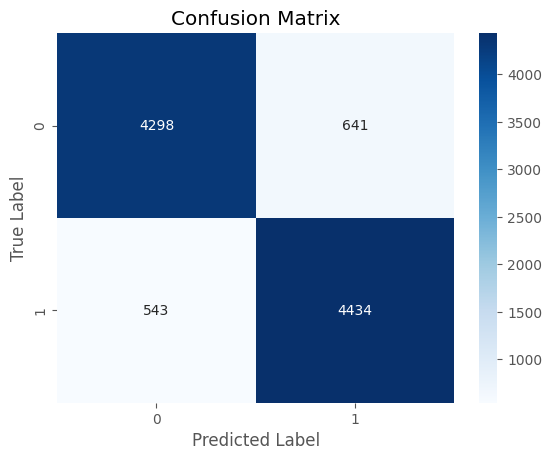

In [28]:
lr_model_bow = LogisticRegression(C= 1, penalty="l2", solver="lbfgs")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_model_trained_bow = train_and_evaluate_model(lr_model_bow, x_train_bow, y_train, x_test_bow, y_test, "accuracy", accuracy_score, skf)

**Prediction From Test Set**

In [29]:
random_review = pd.Series(X_test.sample(1).values)
predict_sentiment(model=lr_model_trained_bow, vectorizer=bow_vectorizer, review= random_review)

Review:  

screen writer miniseries sentenced guillotine butchered fun story squandered talent richard e grant thing writer kept original book name character totally altered story strongly suggest watching another version scarlet pimpernel version better one 



 Prediction: negative


**Prediction From Sample Test Set**

First 3 reviews are positive and last 3 reviews are negative

In [45]:
sample_reviews = [
    "This movie was an absolute masterpiece! The storyline was captivating and the acting was phenomenal.",
    "I thoroughly enjoyed the film! The characters were relatable and the plot kept me engaged from start to finish.",
    "An incredible cinematic experience! The visuals were stunning, and the soundtrack perfectly complemented the story.",
    "Unfortunately, this film was quite disappointing. The plot was predictable and lacked depth.",
    "I was really bored throughout the movie. It felt too long, and the pacing was very slow.",
    "This movie had potential, but it failed to deliver. The acting was subpar and the dialogue was cringeworthy."
]
sample_reviews_df = pd.DataFrame(sample_reviews, columns=["review"])

In [31]:
df_samples_clean= text_preprocessing(sample_reviews_df, "review")
df_samples_clean_list = pd.Series(df_samples_clean["review"]).tolist()
for review in df_samples_clean_list:
    predict_sentiment(model=lr_model_trained_bow, vectorizer=bow_vectorizer, review= review)
    print(50 * "*")

WordNet is not downloaded. Downloading now...

Review:  

movie absolute masterpiece storyline captivating acting phenomenal 



 Prediction: positive

**************************************************

Review:  

thoroughly enjoyed film character relatable plot kept engaged start finish 



 Prediction: positive

**************************************************

Review:  

incredible cinematic experience visuals stunning soundtrack perfectly complemented story 



 Prediction: positive

**************************************************

Review:  

unfortunately film quite disappointing plot predictable lacked depth 



 Prediction: negative

**************************************************

Review:  

really bored throughout movie felt long pacing slow 



 Prediction: negative

**************************************************

Review:  

movie potential failed deliver acting subpar dialogue cringeworthy 



 Prediction: negative

**********************************************

[nltk_data] Downloading package wordnet to /home/kvural/nltk_data...

[nltk_data]   Package wordnet is already up-to-date!


**Naive Bayes model with Bag of Words vectorizing**

Train cross validation score: 0.85

Final test score: 0.85


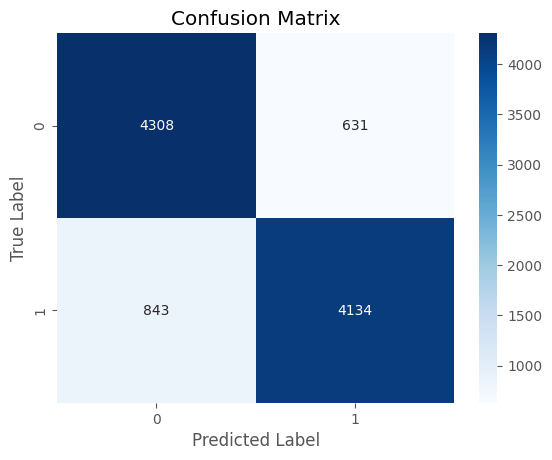

MultinomialNB(alpha=1)

In [32]:
nb_model_bow = MultinomialNB(alpha=1)
train_and_evaluate_model(nb_model_bow, x_train_bow, y_train, x_test_bow, y_test, "accuracy", accuracy_score, skf)

**Prediction From Test Set**

In [33]:
random_review = pd.Series(X_test.sample(1).values)
predict_sentiment(model=nb_model_bow, vectorizer=bow_vectorizer, review= random_review)

Review:  

visual creative epic inimitable stylethis film may neither alternative dramaturgy artistic acting dare say film art im supporter idea important film must serious noncommercial bothering question even lot film apposite attribute likebogus journey sure one film get pure excessive creativity positive charged childlike energy film doesnt reflect reality friendlynaive utopian imagine world future described rufus would pretty nice timeplace combination live except musictechnically bogus jorney well made always liked cinematography scenery movie especially point bogus journey top prequel far also effect good think made without cgi generally prefer good old effect big budget movie sure another hollywood movie people view think charismatic waya short word soundtrack band orchestral music fit well film also sound design lack big fan rock music get track winger scene station build bill ted robot van love unorthodox camera work beginninglet conclude saying thisthis film naive imaginativ

**Prediction From Sample Test Set**

In [34]:
for review in df_samples_clean_list:
    predict_sentiment(model=nb_model_bow, vectorizer=bow_vectorizer, review= review)
    print(50 * "*")

Review:  

movie absolute masterpiece storyline captivating acting phenomenal 



 Prediction: positive

**************************************************

Review:  

thoroughly enjoyed film character relatable plot kept engaged start finish 



 Prediction: positive

**************************************************

Review:  

incredible cinematic experience visuals stunning soundtrack perfectly complemented story 



 Prediction: positive

**************************************************

Review:  

unfortunately film quite disappointing plot predictable lacked depth 



 Prediction: negative

**************************************************

Review:  

really bored throughout movie felt long pacing slow 



 Prediction: negative

**************************************************

Review:  

movie potential failed deliver acting subpar dialogue cringeworthy 



 Prediction: negative

**************************************************


**5.1.1. Term Frequency-Inverse Document Frequency (TF-IDF)**

In [35]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1)).fit(X_train)
x_train_tfidf = tfidf_vectorizer.transform(X_train)
x_test_tfidf = tfidf_vectorizer.transform(X_test)

In [36]:
print(x_train_tfidf.shape, X_test.shape)
print(x_test_tfidf.shape, y_test.shape)

(39663, 191484) (9916,)

(9916, 191484) (9916,)


**LogisticRegression model with TFIDF vectorizing**

Train cross validation score: 0.89

Final test score: 0.89


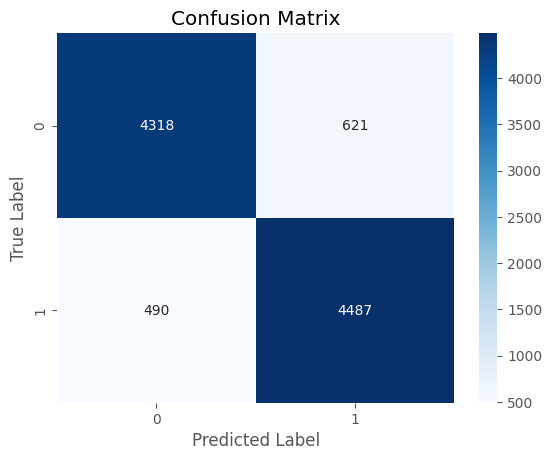

In [37]:
lr_model_tfidf = LogisticRegression(C= 1, penalty="l2", solver="lbfgs")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_model_trained_tfidf = train_and_evaluate_model(lr_model_tfidf, x_train_tfidf, y_train, x_test_tfidf, y_test, "accuracy", accuracy_score, skf)

**Prediction From Test Set**

In [38]:
random_review = pd.Series(X_test.sample(1).values)
predict_sentiment(model=lr_model_trained_tfidf, vectorizer=tfidf_vectorizer, review= random_review)

Review:  

falcon snowman superb example anti film many film decade general lacked substance film pure substance there nothing stylish fake superfluous boast two superb performance timothy hutton sean penn lifelong friend christopher boyce daulton lee respectively hutton penn tom cruise triumvirate early actor looked headed much bigger better thing starred tap penn cruise popularity soared hutton largely forgotten thats shame actually hutton first win oscar supporting role ordinary people think performance movie even outstandinghutton really capture postvietnam war rebelliousness character chris boyce failed seminary school student chris lovehate relationship father well played great character actor pat hingle scene chris quote poem father thought hed long forgotten particularly powerful onechris get job dept defense us hatred u govt foreign policy sell seemingly useless plan old project soviet get buddy daulton hyper drugdealing selfserver courier project plan microfilm chris based be

**Prediction From Sample Test Set**

We are using same sample dataset before

In [39]:
for review in df_samples_clean_list:
    predict_sentiment(model=lr_model_trained_tfidf, vectorizer=tfidf_vectorizer, review= review)
    print(50 * "*")

Review:  

movie absolute masterpiece storyline captivating acting phenomenal 



 Prediction: positive

**************************************************

Review:  

thoroughly enjoyed film character relatable plot kept engaged start finish 



 Prediction: positive

**************************************************

Review:  

incredible cinematic experience visuals stunning soundtrack perfectly complemented story 



 Prediction: positive

**************************************************

Review:  

unfortunately film quite disappointing plot predictable lacked depth 



 Prediction: negative

**************************************************

Review:  

really bored throughout movie felt long pacing slow 



 Prediction: negative

**************************************************

Review:  

movie potential failed deliver acting subpar dialogue cringeworthy 



 Prediction: negative

**************************************************


**Naive Bayes model with TFIDF vectorizing**

Train cross validation score: 0.86

Final test score: 0.86


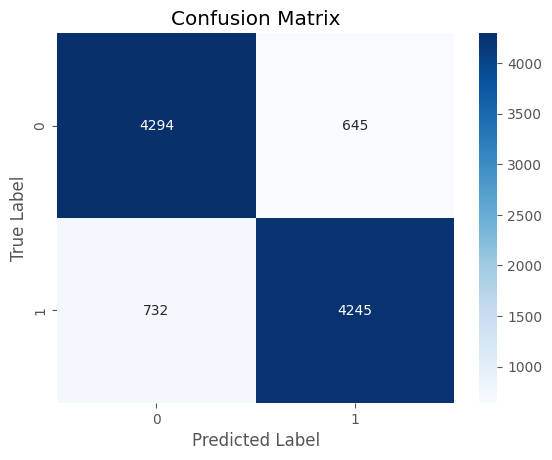

MultinomialNB(alpha=1)

In [40]:
nb_model_tfidf = MultinomialNB(alpha=1)
train_and_evaluate_model(nb_model_tfidf, x_train_tfidf, y_train, x_test_tfidf, y_test, "accuracy", accuracy_score, skf)

**Prediction From Test Set**

In [41]:
random_review = pd.Series(X_test.sample(1).values)
predict_sentiment(model=nb_model_tfidf, vectorizer=tfidf_vectorizer, review= random_review)

Review:  

pathetic worse bad madefortv movie cant believe spacey freeman flick reason morgan freeman character constantly talking saying pussy referring nsync boy girlfriend morgan freeman calling woman pussy awkward hell people behind film thinking many plot hole imagine combined horrid acting confusing camera angle lame script cheap background music made movie absolutely unbearablei rented flop low expectation well really sucked 



 Prediction: negative


**Prediction From Sample Test Set**

In [42]:
for review in df_samples_clean_list:
    predict_sentiment(model=nb_model_tfidf, vectorizer=tfidf_vectorizer, review= review)
    print(50 * "*")

Review:  

movie absolute masterpiece storyline captivating acting phenomenal 



 Prediction: positive

**************************************************

Review:  

thoroughly enjoyed film character relatable plot kept engaged start finish 



 Prediction: positive

**************************************************

Review:  

incredible cinematic experience visuals stunning soundtrack perfectly complemented story 



 Prediction: positive

**************************************************

Review:  

unfortunately film quite disappointing plot predictable lacked depth 



 Prediction: negative

**************************************************

Review:  

really bored throughout movie felt long pacing slow 



 Prediction: negative

**************************************************

Review:  

movie potential failed deliver acting subpar dialogue cringeworthy 



 Prediction: negative

**************************************************


**Result**

Logistic regression and Naive Bayes models were used as machine learning models in the IMDB sentiment analysis dataset. Logistic regression performed better as a model. Among the vectorization techniques, it was observed that the TF-IDF vectorizer method, which improves upon the limitations of BoW, provided better results.

In [43]:
result_dict = {
    "Vectorizer":["Bag Of Words", "Bag Of Words", "TF-IDF","TF-IDF"],
    "Model":["Logistic Regression","Naive Bayes", "Logistic Regression","Naive Bayes"],
    "CV Accuracy Score":[0.88, 0.85, 0.89, 0.86],
    "Test Accuracy Score":[0.88, 0.85, 0.89, 0.86],
}

result_df = pd.DataFrame(result_dict)
result_df

,Vectorizer,Model,CV Accuracy Score,Test Accuracy Score
0,Bag Of Words,Logistic Regression,0.88,0.88
1,Bag Of Words,Naive Bayes,0.85,0.85
2,TF-IDF,Logistic Regression,0.89,0.89
3,TF-IDF,Naive Bayes,0.86,0.86


**5.2 Sentiment Analysis with Deep Learning CNN & LSTM & Multi head Self Attention Model With Embeddings**

**Split data as train and test**

In the tokenizer provided by Keras, we can select the number of words that appear with maximum frequency in the dataset. Therefore, there is no need to remove rare words during the preprocessing stage. Additionally, the deep learning architecture to be created includes self-attention layers and bidirectional LSTM layers. Self-attention is used to understand the relationships and context between words. If lemmatization is performed  the meaning and context of the words may be lost. This situation can hinder the model's ability to better understand the words and their relationships. Therefore, during the preprocessing phase, only lowercase conversion, removal of special characters, and elimination of duplicate comments have been performed.

In [44]:
df = data.copy()

df["review"] = df["review"].apply(clean_text)
df.drop_duplicates(inplace=True)
df["sentiment"] = np.where(df["sentiment"] == "positive", 1 , 0)

feature = "review"
target = "sentiment"
X = df[feature]
y= df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**Tokenization**

In the machine learning section, we utilized CountVectorizer and TF-IDF Vectorizers. These tools add all the words in the document as features and extract their frequencies, effectively tokenizing the text.

When training a deep learning model, we first need to perform the tokenization ourselves. Using the Tokenizer available in Keras, each review is broken down into tokens, and each token is assigned a number based on its frequency in the text.

To expedite the training process and obtain more accurate results, we can choose to use words that occur frequently in the dataset during the tokenization process. The dataset contains a total of `202445` words. For the model, we will use the top `15000` words with the highest frequencies, denoted as `max_freq_words = 15000`. Any words outside this set will be classified as `<oov> (out-of-vocabulary)`.

`tokenizer = Tokenizer(num_words = max_freq_words, oov_token="<oov>")`


Subsequently, these words are converted into numerical representations. However, a problem arises because the size of each review varies. To address this, we use the pad_sequences function, which fills in the missing words with zeros, ensuring that each input value has the same size. We can define the maximum size for each input during the padding sequence process.

To determine this maximum size, we first calculated the token size of all reviews in the training and test sets. We then averaged these sizes and added two standard deviations, resulting in a maximum length of `557`. This number represents `95%` of the entire dataset. We have now established the maximum number of features that will be input into the model.

In [45]:
max_freq_words = 15000
tokenizer = Tokenizer(num_words = max_freq_words, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
total_vocabulary_size = len(word_index)
print(f"Total vocabulary of the dataset is : {total_vocabulary_size}")

Total vocabulary of the dataset is : 202445


In [46]:
train_review_sequences = tokenizer.texts_to_sequences(X_train)
test_review_sequences =  tokenizer.texts_to_sequences(X_test)

In [47]:
total_review_sequences_length_list = [len(i) for i in train_review_sequences + test_review_sequences]

In [48]:
max_review_sequence=max(total_review_sequences_length_list)
print(f"Maximum length of review sequence in the list is {max_review_sequence}")

Maximum length of review sequence in the list is 2413


In [49]:
pad_seq_max_len = np.mean(total_review_sequences_length_list) + 2 * np.std(total_review_sequences_length_list)
pad_seq_max_len = round(pad_seq_max_len)
print(f"Max length padding for pad_sequence function is {pad_seq_max_len}")

Max length padding for pad_sequence function is 557


In [50]:
cover_percentage= np.sum(np.array(total_review_sequences_length_list) < pad_seq_max_len) / len(total_review_sequences_length_list)*100
print(f"The maximum length calculated for the pad sequence function covers %{cover_percentage:.2f} of the reviews in the dataset.")

The maximum length calculated for the pad sequence function covers %94.54 of the reviews in the dataset.


**Word2Vec Training for Embeddings Matrix**

During the training phase of the model, an embeddings layer is added, and the weights for this layer are initialized randomly, initiating the learning process of the embedding layer.

To accelerate this process and enhance performance, we can leverage weights from another model through transfer learning. For this purpose, we use a pre-trained Word2Vec model, which we will fine-tune using our sentiment analysis dataset to obtain the weights that will then be fed into the embedding layer. The relevant function is provided in `utils.py`.

In [51]:
vector_size = 128
total_vocabulary_size =  202445 
embedding_matrix = train_word2vec_and_get_embedding_matrix(X_train=X_train,
                                                           total_vocabulary_size = total_vocabulary_size,
                                                           vector_size=vector_size,
                                                           tokenizer=tokenizer)

**Preprocess Sentiment Data**

In the tokenization section, the preprocessing steps we performed to obtain the maximum pad sequence have been encapsulated into a function. Additionally, preprocessing has been carried out on the previously split train and test datasets before they are fed into the model.

In [52]:
max_freq_words = 15000
pad_seq_max_len = 557

X_train_processed, X_test_processed = preprocess_sentiment_data(X_train=X_train, 
                                                               X_test=X_test,
                                                               most_freq_words=max_freq_words,
                                                               max_padding_length=pad_seq_max_len)

**CNN & LSTM & Multi Head Self Attention Model**

**Model Architecture**


1. **Embedding Layer**
- This layer allows the model to represent words as numbers. Words are transformed into high-dimensional vectors composed of continuous values. This way, the similarities between words can be represented numerically. For example, words like "cat" and "dog" that are similar in meaning will be close to each other in these vectors.

2. **Batch Normalization**
- This layer normalizes the data within each mini-batch, helping the model learn faster and more stably. It makes the training process more efficient.

3. **Conv1D + MaxPooling1D (1D Convolution + Max Pooling)**
- **Conv1D**: This layer extracts local features from word sequences, i.e., it learns relationships between adjacent words in a sentence.
- **MaxPooling1D**: This layer selects the most important features from the convolution layer and reduces the size. This allows the model to capture meaningful patterns with fewer details.

4. **Self-Attention Layer**
This layer is used to capture long-distance relationships between words in a sentence. Here’s a detailed breakdown of its components:

- **Multi-Head Attention**:
    - This mechanism finds the relationship between each word and other words in a sentence. By using multiple heads, these relationships are examined from different perspectives simultaneously. For example, in a sentence, "movie" and "amazing" might be far apart, but they have a strong relationship. This layer learns such dependencies.
    
- **Dropout**:
    - To prevent overfitting, some neurons are randomly turned off. This ensures that the model generalizes better during the training process.
    
- **Layer Normalization**:
    - This normalizes the information coming from the attention layer, ensuring that the outputs from each attention head are on the same scale, providing stability during training.
    
- **Feed Forward Layer**:
    - This layer processes the information coming from the attention mechanism and strengthens the learning process. The ReLU activation function used in this layer speeds up learning and extracts richer features. As a result, the model can capture more complex relationships between words.
    
- **Residual Connection**:
    - This mechanism directly adds the input to the output, combining the raw data with the processed information. This ensures that important information is retained even as it passes through deeper layers, preventing the loss of valuable information.

5. **Bidirectional LSTM**
- LSTM (Long Short-Term Memory) layers learn long-term dependencies in sequences (or texts). **Bidirectional LSTM** reads sentences both forward and backward, learning relationships in both directions. For example, the sentence "I ate the apple" and "The apple I ate" convey the same meaning, and this layer captures both directions effectively.

6. **Dense Layer**
- This layer takes the final output and creates a linear relationship to perform classification. Ultimately, it produces a probability value for classification as either positive or negative.

7. **Sigmoid Activation**
- The activation function in the final layer, **sigmoid**, outputs a probability value between 0 and 1. This value is used to determine whether the prediction is positive or negative. For example, if the output is greater than 0.5, the model classifies the input as positive.


The layers used in this architecture are designed to learn both short- and long-distance relationships between words, helping the model capture the meaning of text more effectively. The **Self-Attention Layer** helps the model focus on the important words by learning these relationships. The **Conv1D** layer extracts local features, while the **LSTM** layers learn longer dependencies in the text. Finally, the **Dense** and **Sigmoid** layers handle the final classification, determining whether the text is positive or negative.

Compared to traditional methods in NLP, this architecture can learn more complex relationships, leading to better performance.


**The created functions, along with their explanations, are located in the `utils.py` file.**


In [62]:
embedding_dim = 128
total_word_size = 202445
maxlen = 557
epochs = 10
batch_size = 64
validation_split = 0.2


result, _ = sentiment_cnn_lstm_att_model(X_train=X_train_processed,
                                         y_train=y_train,
                                         total_word_size=total_word_size,
                                         embedding_dim=embedding_dim,
                                         maxlen=maxlen,
                                         batch_size=batch_size,
                                         validation_split=validation_split,
                                         epochs=epochs,
                                         embedding_matrix=embedding_matrix)

Epoch 1/10

496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.6645 - loss: 0.5718

Epoch 1: val_loss improved from inf to 0.38391, saving model to ./model/best_model.keras

496/496 ━━━━━━━━━━━━━━━━━━━━ 241s 470ms/step - accuracy: 0.6647 - loss: 0.5715 - val_accuracy: 0.8153 - val_loss: 0.3839 - learning_rate: 0.0010

Epoch 2/10

496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9192 - loss: 0.2121

Epoch 2: val_loss improved from 0.38391 to 0.26056, saving model to ./model/best_model.keras

496/496 ━━━━━━━━━━━━━━━━━━━━ 230s 464ms/step - accuracy: 0.9192 - loss: 0.2121 - val_accuracy: 0.8971 - val_loss: 0.2606 - learning_rate: 0.0010

Epoch 3/10

496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.9665 - loss: 0.1009

Epoch 3: val_loss did not improve from 0.26056

496/496 ━━━━━━━━━━━━━━━━━━━━ 226s 455ms/step - accuracy: 0.9665 - loss: 0.1009 - val_accuracy: 0.8897 - val_loss: 0.3077 - learning_rate: 0.0010

Epoch 4/10

496/496 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - acc

**Model Evaluation**

The model started learning the data by the second epoch due to the small dataset size and then showed signs of overfitting. The model was captured and saved by the checkpoint while it was in a balanced state.. 

This model achieved the best performance with 91% training accuracy and 90% test accuracy. 

At this point, one might ask:

`If logistic regression + TF-IDF vectorization already achieved 89% accuracy, why is there a need for such a complex architecture?`

**This situation can be explained as follows:**

1. **Less Preprocessing**: This structure allowed for less preprocessing by eliminating the need for rare word removal and lemmatization during the processing phase.

1. **Generalization to Complex Data**: While logistic regression and Naive Bayes are effective for simpler datasets, they may struggle when faced with more complex and nuanced data. The deep learning model, especially with **self-attention** and **LSTM layers**, can capture more intricate relationships between words, allowing it to generalize better on complex datasets. In production environments, where the model will be fed more data, using this developed model is more suitable than logistic regression.

2. **Scalability and Future Potential**: As the dataset grows or becomes more complex, deep learning models tend to scale better. Traditional models like logistic regression may hit a performance ceiling, whereas deep learning architectures have the capacity to further improve with more data and fine-tuning.

3. **Feature Learning**: Logistic regression relies on manual feature extraction, such as TF-IDF vectorization. On the other hand, deep learning models automatically learn useful features from raw data, reducing the need for manual intervention. Moreover, deep learning models can capture subtle semantic meanings and long-distance word dependencies that simpler models may overlook.

In summary, even though the accuracy difference seems small at the moment, deep learning models are likely to perform better in the long run, especially when handling more challenging, larger, or nuanced datasets.


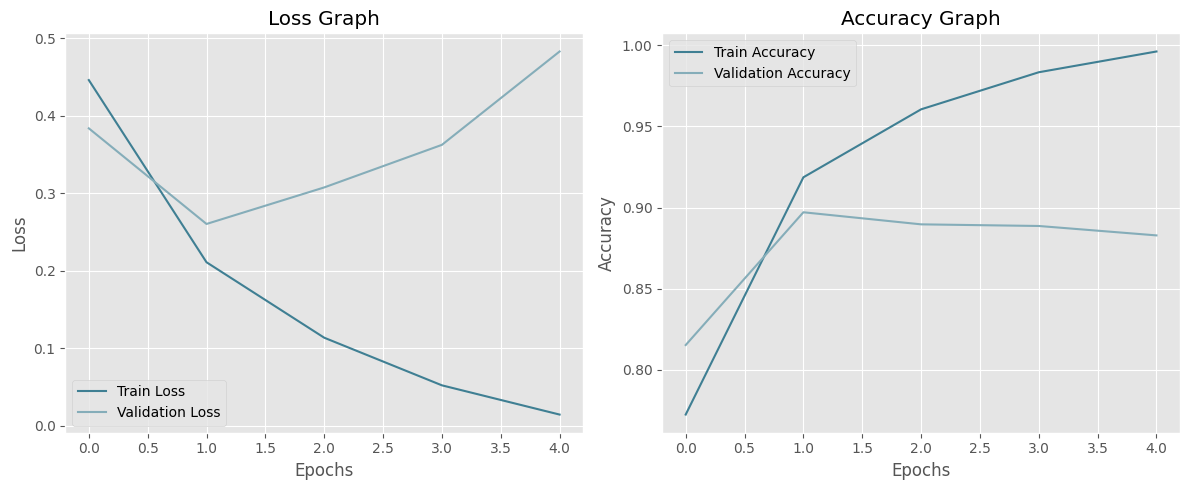

In [66]:
plot_training_history(result)

In [145]:
model = load_model("./model/best_model1.keras")

310/310 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.8947 - loss: 0.2568

Test Accuracy: 0.8960 | Loss: 0.2636

310/310 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step


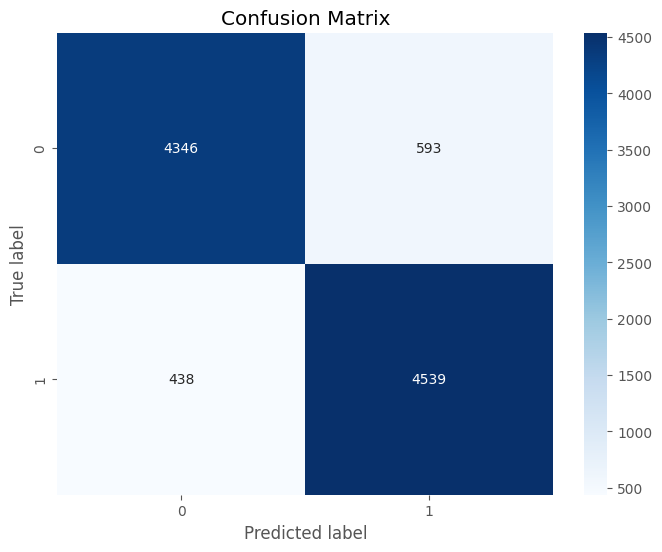

In [146]:
evaluate_model(model, X_test_processed, y_test)

**Prediction**

The prediction phase was tested with a sample from the test set. Subsequently, predictions were made on a test dataset containing three positive and three negative reviews, demonstrating that the model successfully passed these tests.

**Prediction From Test Set**

In [152]:
random_review = X_test.sample(1).values[0]
sentiment_cnn_lstm_att_predict(random_review, model, tokenizer, maxlen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Review:



mislead by the terrible lie on the cover fun as american pie my girlfriend and i sat in front of the tv waiting for a comedy and this is definitely not one you probably wont laugh one time if youre not one of those jackasslike everteeny minds its not even an erotic movie which would at least been something given that its about sexso what is this the erratic plot deals with a guy who wants to lose virginity zero in originality i remember losing it for one and his gang of friends the rest of the characters ie the girls just come and go for no credible reason come on there are even dwarfs so simple dwarves are fun ho ho the acting is very tvlike as is the video look throughout the movie and definitely amateur in the case of most of the girlsawful movie amateurish badly produced and over all not funny kids and teens will love to watch it with friends because of the swearing and sex jokes other than that dont even think of renting this movie

**Prediction From Sample Test Set**

In [151]:
for review in df_samples_clean_list:
    sentiment_cnn_lstm_att_predict(review, model, tokenizer, maxlen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Review:



movie absolute masterpiece storyline captivating acting phenomenal



Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Review:



thoroughly enjoyed film character relatable plot kept engaged start finish



Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Review:



incredible cinematic experience visuals stunning soundtrack perfectly complemented story



Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

Review:



unfortunately film quite disappointing plot predictable lacked depth



Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

Review:



really bored throughout movie felt long pacing slow



Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

Review:



movie potential failed deliver acting subpar dialogue cringeworthy



Negative


**5.3 Sentiment Analysis with BERT Model**

In [6]:
df = data.copy()

df["review"] = df["review"].apply(clean_text)
df.drop_duplicates(inplace=True)
df["sentiment"] = np.where(df["sentiment"] == "positive", 1 , 0)

feature = "review"
target = "sentiment"
X = df[feature]
y= df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Extra splitting the train set into train and validation
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2,random_state=42)

**Tokenization**

BERT and other transformer models use tokenization to process text. This process breaks the text into smaller units, making it suitable for input to the model. The AutoTokenizer used here is downloaded from Hugging Face's transformers library.

```python
tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert-base-uncased")

```
This tokenizer splits words into subwords to fit BERT’s input requirements. During tokenization:

- max_length sets the sentence length.
- truncation cuts off sentences that are too long.
- padding fills shorter sentences to the required length.
- add_special_tokens adds special tokens like [CLS] and [SEP] at the beginning and end of sentences.

While this process is similar to the tokenization used in deep learning, BERT’s use of subwords and special tokens is more advanced, allowing the model to better capture language relationships and improve performance.

Same max padding lenght have been chosen at Bert model.

In [7]:
maxlen_bert = 557

In [8]:
tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [9]:
X_train_tokens = tokenizer(X_train.tolist(),
                           max_length=maxlen_bert, 
                           truncation=True,
                           padding="max_length",
                           add_special_tokens=True,
                           return_tensors="tf")

X_val_tokens = tokenizer(X_val.tolist(),
                         max_length=maxlen_bert, 
                         truncation=True,
                         padding="max_length", 
                         add_special_tokens=True,
                         return_tensors="tf")

X_test_tokens = tokenizer(X_test.tolist(),
                          max_length=maxlen_bert, 
                          truncation=True,
                          padding="max_length", 
                          add_special_tokens=True,
                          return_tensors="tf")

This code converts the tokenized input data and labels into TensorFlow datasets and divides them into batches of 32 for training, validation, and testing. This allows the model to process the data efficiently during training.

In [10]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((dict(X_train_tokens), y_train.values))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(X_val_tokens), y_val.values))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(X_test_tokens), y_test.values))


train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

**DistilBERT Model (Transformer):**

At the core of the model, we have a pre-trained language model called DistilBERT, which is a lighter version of BERT. It is used to extract contextual meaning from text. DistilBERT has been trained on large amounts of text data to capture relationships between words and sentences.

```python
transformer = TFDistilBertModel.from_pretrained('distilbert-base-uncased')
```
The architecture leverages a pre-trained DistilBERT transformer model, which is a smaller, faster version of BERT, designed to capture essential contextual information from text. Below is a brief breakdown of the components:

**CustomDistilBertLayer:** 

This is a custom Keras layer that incorporates the pre-trained DistilBERT model to extract features. It takes input in the form of tokenized text (input IDs and attention masks) and passes this information through the transformer model.

**[CLS] Token:**

In BERT-like models, the [CLS] token is a special token added at the beginning of each input sequence. This token stands for "classification" and is used to summarize the entire sequence. The transformer outputs a hidden state corresponding to this [CLS] token, which is used for classification tasks. In this architecture, we utilize the hidden state associated with the [CLS] token to capture the overall meaning of the input text.
Model Structure:

**Input Layers:** 

The model takes two inputs: input_ids and attention_mask. These represent the tokenized input text and attention masks respectively, ensuring the model focuses on relevant tokens.

**DistilBERT Output:** 

The CustomDistilBertLayer passes the inputs through the transformer model and extracts the hidden state corresponding to the [CLS] token. This hidden state contains contextual information from the entire sequence.

**Dense Layers:** Following the transformer, a Dense layer with ReLU activation is applied to further process the features. Dropout is added to prevent overfitting.
Output Layer: Finally, a sigmoid-activated Dense layer is used for binary classification (1 or 0).

This architecture enables the model to effectively utilize DistilBERT's pre-trained language understanding capabilities while incorporating additional layers for specific downstream tasks such as classification. We trained our sentiment analysis data using transfer learning with DistilBERT, allowing it to leverage pre-existing knowledge from vast text corpora and adapt it to our specific dataset.

In [11]:
transformer = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [39]:
epochs = 10
batch_size = 32

result, model = create_and_train_bert_model(train_dataset=train_dataset,
                                       val_dataset=val_dataset,
                                       max_len=maxlen_bert,
                                       transformer=transformer,
                                       batch_size=batch_size,
                                       epochs=epochs)

Epoch 1/10


W0000 00:00:1730110270.016900      82 assert_op.cc:38] Ignoring Assert operator functional_9_1/custom_distil_bert_layer_5_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


991/992 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.7165 - loss: 0.5902

W0000 00:00:1730110537.406244      82 assert_op.cc:38] Ignoring Assert operator functional_9_1/custom_distil_bert_layer_5_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


992/992 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.7166 - loss: 0.5901

W0000 00:00:1730110542.243762      81 assert_op.cc:38] Ignoring Assert operator functional_9_1/custom_distil_bert_layer_5_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert
W0000 00:00:1730110608.179565      79 assert_op.cc:38] Ignoring Assert operator functional_9_1/custom_distil_bert_layer_5_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert



Epoch 1: val_loss improved from inf to 0.44067, saving model to bert_model.keras
992/992 ━━━━━━━━━━━━━━━━━━━━ 346s 339ms/step - accuracy: 0.7167 - loss: 0.5900 - val_accuracy: 0.8171 - val_loss: 0.4407 - learning_rate: 2.0000e-05
Epoch 2/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8260 - loss: 0.4174
Epoch 2: val_loss improved from 0.44067 to 0.39191, saving model to bert_model.keras
992/992 ━━━━━━━━━━━━━━━━━━━━ 329s 332ms/step - accuracy: 0.8260 - loss: 0.4174 - val_accuracy: 0.8292 - val_loss: 0.3919 - learning_rate: 2.0000e-05
Epoch 3/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8375 - loss: 0.3772
Epoch 3: val_loss improved from 0.39191 to 0.37402, saving model to bert_model.keras
992/992 ━━━━━━━━━━━━━━━━━━━━ 329s 331ms/step - accuracy: 0.8375 - loss: 0.3772 - val_accuracy: 0.8371 - val_loss: 0.3740 - learning_rate: 2.0000e-05
Epoch 4/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8461 - loss: 0.3589
Epoch 4: val_loss improved from 0.374

**Model Evaluation**

The BERT model achieved an 86% test score. While this may seem relatively lower compared to other deep learning architecture above. But it's important to note that transformer models like BERT typically exhibit their true performance when trained on large datasets. Additionally, during training in the Colab environment, the same model attained a 91% test score. However, due to usage limitations, the model could not be saved at that time.

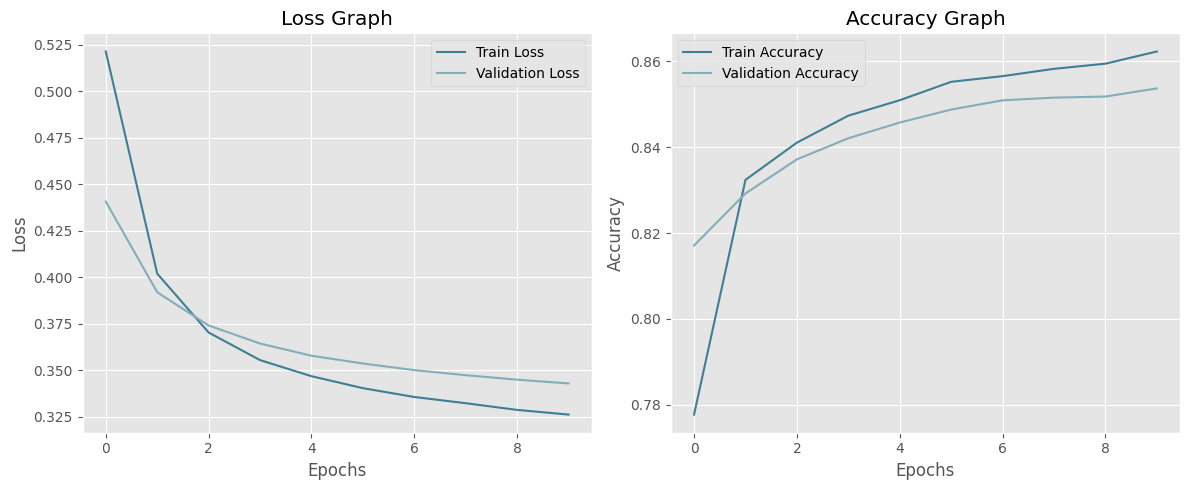

In [40]:
plot_training_history(result)

309/310 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.8567 - loss: 0.3342

W0000 00:00:1730113678.919055      79 assert_op.cc:38] Ignoring Assert operator functional_9_1/custom_distil_bert_layer_5_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


310/310 ━━━━━━━━━━━━━━━━━━━━ 84s 272ms/step - accuracy: 0.8567 - loss: 0.3342
Test Accuracy: 0.8567 | Loss: 0.3362


W0000 00:00:1730113681.976935      82 assert_op.cc:38] Ignoring Assert operator functional_9_1/custom_distil_bert_layer_5_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


309/310 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step

W0000 00:00:1730113764.744123      82 assert_op.cc:38] Ignoring Assert operator functional_9_1/custom_distil_bert_layer_5_1/tf_distil_bert_model/distilbert/embeddings/assert_less/Assert/Assert


310/310 ━━━━━━━━━━━━━━━━━━━━ 85s 268ms/step


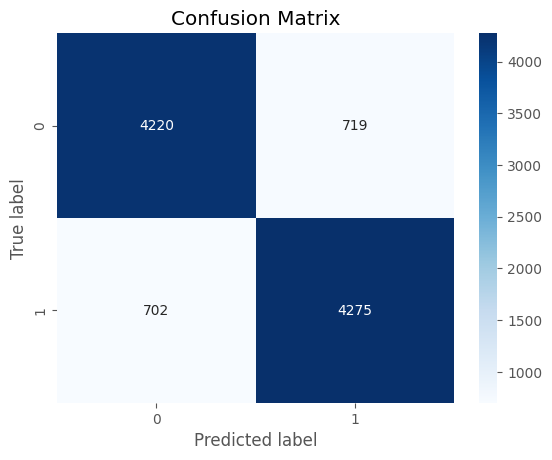

In [42]:
evaluate_bert(test_dataset, y_test, model)

**Prediction**

Like all other models in this notebook, the BERT model has successfully passed the tests conducted during the prediction phase.

**Prediction From Sample Test**

In [46]:
random_review = X_test.sample(1).values[0]
max_len = 557

bert_predict(random_review, tokenizer, model, max_len )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
this movie was downright awful most of the comedic scenes seem stale and trite and possibly the funniest scene in the movie had already been given away in previews the entire premise of the movie is so unbelievable and ridiculous its hard to really get into it the actors themselves portray the most unrealistic characters its not just the fact that the movies so hard to swallow but its how they keep forcing it down your throat expecting you to dumb down and accept it the plot itself is so shallow and easy to predict boy somehow gets rejected from every school he applied toi suppose he completely forgot about attending community college and decides to create his own school for fellow rejects all goes well for awhile until the validity of his school comes into question all the while the dorky character manages to woo his beautiful neighbor into falling for him with his witty sarcasm which apparently is a skill only he possesses then comes the final st

**Prediction From Sample Test Set**

In [47]:
sample_reviews = [
    "This movie was an absolute masterpiece! The storyline was captivating and the acting was phenomenal.",
    "I thoroughly enjoyed the film! The characters were relatable and the plot kept me engaged from start to finish.",
    "An incredible cinematic experience! The visuals were stunning, and the soundtrack perfectly complemented the story.",
    "Unfortunately, this film was quite disappointing. The plot was predictable and lacked depth.",
    "I was really bored throughout the movie. It felt too long, and the pacing was very slow.",
    "This movie had potential, but it failed to deliver. The acting was subpar and the dialogue was cringeworthy."
]

In [48]:
for review in sample_reviews:
    bert_predict(review, tokenizer, model, max_len )
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This movie was an absolute masterpiece! The storyline was captivating and the acting was phenomenal.

positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
I thoroughly enjoyed the film! The characters were relatable and the plot kept me engaged from start to finish.

positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
An incredible cinematic experience! The visuals were stunning, and the soundtrack perfectly complemented the story.

positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Unfortunately, this film was quite disappointing. The plot was predictable and lacked depth.

negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
I was really bored throughout the movie. It felt too long, and the pacing was very slow.

negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This movie had potential, but it failed to deliver. The acting was subpar and the dialogue was cringeworthy.

negative


### **6. Topic Modeling**

Topic modeling is a technique used to automatically identify themes or topics in large text datasets. It typically analyzes how words come together to help determine specific topics, allowing users to extract meaningful insights from the texts.

In [21]:
# nltk.download("stopwords")
# nltk.download("punkt")
# nltk.download("punkt_tab")
# nltk.download("wordnet")


[nltk_data] Downloading package punkt_tab to /home/kvural/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**6.1. Data Preprocessing**

This processes the text data. It performs operations such as converting to lowercase, removing special characters, and lemmatization. This step makes the data more suitable for analysis.

In [11]:
df = data.copy()
df = text_preprocessing(df, "review")

WordNet is not downloaded. Downloading now...


[nltk_data] Downloading package wordnet to /home/kvural/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**6.2. Tokenization**

 It splits each review sentence into words (tokens). Tokenization allows the text to be broken down into individual units, enabling further processing on each. Like we did all sentiment analysis methods above.

In [22]:
tokenized_reviews = df["review"].apply(word_tokenize)

**6.3. Creating a Dictionary**

This creates a dictionary containing unique words from the tokenized sentences. This dictionary contains the indices that the model will use to represent words.

In [26]:
dictionary = corpora.Dictionary(tokenized_reviews)

**6.4. Creating a Corpus**

 It converts each sentence into a numerical format based on the frequency of words in the dictionary. The doc2bow function returns the count of each word, transforming sentences into a numerical representation.

In [28]:
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

**6.5. Creating the Latent Dirichlet Allocadion (LDA)**

The model uses the corpus and dictionary to identify a specific number of topics (e.g., 5). The passes parameter determines how many iterations the model will run during training. It searches releationships among the words and separates the words into a topics.

In [29]:
lda_model = LdaModel(corpus = corpus, id2word=dictionary, num_topics = 5 , passes = 10)

This process displays the specific topics in the models along with the words related to those topics. Each topic is listed with the words that are most likely associated with it.

In [31]:
topics = lda_model.show_topics(formatted=False)
for topic in topics:
    print('\nTopic', topic[0], '\n', [word[0] for word in topic[1]])


Topic 0 
 ['movie', 'film', 'like', 'one', 'good', 'really', 'time', 'see', 'would', 'even']

Topic 1 
 ['film', 'one', 'great', 'performance', 'role', 'story', 'character', 'best', 'also', 'play']

Topic 2 
 ['film', 'life', 'one', 'story', 'world', 'people', 'u', 'war', 'man', 'time']

Topic 3 
 ['film', 'one', 'scene', 'get', 'horror', 'plot', 'character', 'even', 'like', 'there']

Topic 4 
 ['monster', 'vampire', 'fight', 'alien', 'cartoon', 'get', 'effect', 'space', 'back', 'creature']


This shows the scores of topics in the first document and the word distributions for specific topics. It indicates which topics are more dominant in the sentence.

In [32]:
for index, score in sorted(lda_model[corpus[0]], key=lambda tup: -1*tup[1]):
    print('\nScore: {}\t \n Topic: {}'.format(score, lda_model.print_topic(index, 5)))


Score: 0.39353179931640625	 
 Topic: 0.014*"film" + 0.008*"life" + 0.006*"one" + 0.005*"story" + 0.005*"world"

Score: 0.3125487267971039	 
 Topic: 0.018*"film" + 0.008*"one" + 0.007*"scene" + 0.005*"get" + 0.005*"horror"

Score: 0.2914041578769684	 
 Topic: 0.041*"movie" + 0.013*"film" + 0.013*"like" + 0.012*"one" + 0.009*"good"


**6.6. Calculating Coherence Score**

This evaluates the coherence of the model. Coherence is a measure of how well the topics are represented by the model. A high coherence score indicates that the topics are more meaningful.

In [34]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3237589079937394



**6.7. Other Topic Modeling Methods**

**Non-negative Matrix Factorization (NMF)**

- **Definition**: NMF is a technique that represents a data matrix as the product of two matrices, revealing the relationships between words and topics.
- **Applications**: It is often preferred for smaller text datasets as it provides more interpretable results.

**More Advanced Methods**
In recent years, especially with the development of deep learning and transformer-based approaches, new and more advanced methods have emerged in the field of topic modeling:

**BERT and Related Models**

- **Definition**: Models like BERT (Bidirectional Encoder Representations from Transformers) learn the meaning of words based on context, allowing for deeper analysis of texts. BERT-based topic modeling can extract richer themes by considering the context of words.
- **Applications**: BERT and its derivatives are used in language modeling, text classification, and other NLP tasks.

**Top2Vec**

- **Definition**: Top2Vec is a modern method for discovering topics from text using embedded vectors. This approach directly extracts topics using the embedded representations of words and documents.
- **Applications**: It is used for effective topic discovery in large text datasets and can provide better results compared to traditional methods like LDA.

**BERTopic**

- **Definition**: BERTopic is a library aimed at discovering topics using BERT-based embedding methods. This method performs topic modeling based on the embedding representations of documents.
- **Applications**: It is used to extract more meaningful and context-focused topics when working with comprehensive text collections.


### **7. Conclusion and Final Thoughts**

Natural Language Processing (NLP) is advancing at a rapid pace, and this project aimed to highlight some of the key developments over time. In this study, the dataset was first analyzed using different vectorization techniques, and sentiment analysis was conducted with machine learning models such as Logistic Regression and Naive Bayes. Afterward, a deep learning architecture was implemented, followed by sentiment analysis using the more advanced BERT model.

Due to the small size of the dataset, all models exhibited similar performance. If a much larger dataset had been used, the strengths of the deep learning architecture and the BERT model would have become more apparent, as these models are designed to capture complex relationships in large datasets. In fact, BERT achieved a slightly lower score than the other models, indicating its need for larger data—this could be compared to putting too little fuel in a Ferrari. :)

In conclusion, if quick analysis is needed on smaller datasets, traditional machine learning models remain highly effective. However, for larger datasets and when developing models for production environments, transformer-based models like BERT are frequently utilized due to their capability to capture intricate relationships in vast amounts of data.

Additionally, topic modeling was applied to extract hidden themes within the text data. This unsupervised learning technique helped to uncover underlying patterns, providing further insights into the broader context of the data.